# CaSR SWE Data Analysis Notebook

This notebook demonstrates comprehensive analysis of Canadian Snow and Sea Ice Service Reanalysis (CaSR) precipitation data using the enhanced analysis functions.

## Overview
- **Dataset**: CaSR v3.1 24-hour precipitation accumulation
- **Time Period**: 1980-1983
- **Spatial Coverage**: Western Canada (rotated pole grid)
- **Analysis Features**: Precipitation analysis, coordinate analysis, visualizations

## 1. Setup and Imports

In [30]:
# Import required libraries
import os
import sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path

project_root = Path().cwd().parent.parent
sys.path.append(str(project_root))

# Import our custom analyzer class
from analyze_casr_swe_data_improved import CaSRDataAnalyzer

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("✓ Libraries imported successfully")
print(f"✓ Working directory: {os.getcwd()}")

✓ Libraries imported successfully
✓ Working directory: c:\Users\askha\github\snowdroughtindex-main-1\notebooks\workflows


## 2. Initialize Data Analyzer

In [31]:
# Define file path
file_loc = r"data\input_data\CaSR_SWE\CaSR_v3.1_A_PR24_SFC_rlon211-245_rlat386-420_1980-1983.nc"
file_path = project_root / file_loc
# Check if file exists
if os.path.exists(file_path):
    print(f"✓ File found: {file_path}")
    print(f"✓ File size: {os.path.getsize(file_path) / (1024**2):.2f} MB")
else:
    print(f"✗ File not found: {file_path}")
    print("Please check the file path.")

# Initialize analyzer
analyzer = CaSRDataAnalyzer(file_path)
print("✓ CaSR Data Analyzer initialized")

✓ File found: c:\Users\askha\github\snowdroughtindex-main-1\data\input_data\CaSR_SWE\CaSR_v3.1_A_PR24_SFC_rlon211-245_rlat386-420_1980-1983.nc
✓ File size: 8.79 MB
✓ CaSR Data Analyzer initialized


## 3. Load and Examine Dataset

In [32]:
# Load the dataset
success = analyzer.load_data()

if success:
    print("\n" + "="*60)
    print("DATASET LOADED SUCCESSFULLY")
    print("="*60)
    
    # Display basic dataset information
    analyzer.display_basic_info()
else:
    print("Failed to load dataset")

Loading data from: c:\Users\askha\github\snowdroughtindex-main-1\data\input_data\CaSR_SWE\CaSR_v3.1_A_PR24_SFC_rlon211-245_rlat386-420_1980-1983.nc
✓ Data loaded successfully!

DATASET LOADED SUCCESSFULLY

DATASET BASIC INFORMATION
File: CaSR_v3.1_A_PR24_SFC_rlon211-245_rlat386-420_1980-1983.nc
File size: 8.79 MB

Dimensions:
  time: 35,064
  rlat: 35
  rlon: 35

Data Variables:
  rotated_pole: () - ()
  CaSR_v3.1_A_PR24_SFC: ('time', 'rlat', 'rlon') - (35064, 35, 35)
    Description: Analysis: Quantity of precipitation (CaPA 24h) at surface
    Units: m

Coordinate Variables:
  time: ('time',) - (35064,)
    Description: Validity time
  lon: ('rlat', 'rlon') - (35, 35)
    Description: longitude
    Units: degrees_east
  lat: ('rlat', 'rlon') - (35, 35)
    Description: latitude
    Units: degrees_north
  rlon: ('rlon',) - (35,)
    Description: longitude in rotated pole grid
    Units: degrees
  rlat: ('rlat',) - (35,)
    Description: latitude in rotated pole grid
    Units: degrees

## 4. Temporal Analysis

In [33]:
# Perform temporal analysis
analyzer.analyze_temporal_coverage()

# Access temporal results
if 'temporal' in analyzer.analysis_results:
    temporal_stats = analyzer.analysis_results['temporal']
    
    print("\n" + "="*50)
    print("TEMPORAL ANALYSIS SUMMARY")
    print("="*50)
    print(f"Start Date: {temporal_stats['start_date']}")
    print(f"End Date: {temporal_stats['end_date']}")
    print(f"Duration: {temporal_stats['duration_days']} days")
    print(f"Total Timesteps: {temporal_stats['n_timesteps']:,}")
    print(f"Frequency: {temporal_stats['most_common_freq']}")


TEMPORAL ANALYSIS
Time range: 1979-12-31 13:00:00 to 1983-12-31 12:00:00
Number of time steps: 35,064
Duration: 1460 days
Most common time step: 0 days 01:00:00

Yearly distribution:
  1979: 11 timesteps
  1980: 8,784 timesteps
  1981: 8,760 timesteps
  1982: 8,760 timesteps
  1983: 8,749 timesteps

Monthly distribution:
  Jan: 2,976 timesteps
  Feb: 2,712 timesteps
  Mar: 2,976 timesteps
  Apr: 2,880 timesteps
  May: 2,976 timesteps
  Jun: 2,880 timesteps
  Jul: 2,976 timesteps
  Aug: 2,976 timesteps
  Sep: 2,880 timesteps
  Oct: 2,976 timesteps
  Nov: 2,880 timesteps
  Dec: 2,976 timesteps

TEMPORAL ANALYSIS SUMMARY
Start Date: 1979-12-31 13:00:00
End Date: 1983-12-31 12:00:00
Duration: 1460 days
Total Timesteps: 35,064
Frequency: 0 days 01:00:00


## 5. Detailed Coordinate Variable Examination

In [34]:
# Detailed examination of all coordinate variables in the NetCDF file
print('COORDINATE VARIABLES IN THE NETCDF FILE:')
print('='*60)

dataset = analyzer.dataset

for coord_name, coord_var in dataset.coords.items():
    print(f'\nCoordinate: {coord_name}')
    print(f'  Dimensions: {coord_var.dims}')
    print(f'  Shape: {coord_var.shape}')
    print(f'  Data type: {coord_var.dtype}')
    
    # Show attributes
    if coord_var.attrs:
        print(f'  Attributes:')
        for attr, value in coord_var.attrs.items():
            print(f'    {attr}: {value}')
    
    # Show sample values
    if coord_var.size <= 10:
        print(f'  Values: {coord_var.values}')
    else:
        # Handle different data types
        if coord_var.dtype.kind in ['f', 'i']:  # float or integer
            print(f'  Value range: {coord_var.min().values:.6f} to {coord_var.max().values:.6f}')
        else:  # datetime or other types
            print(f'  Value range: {coord_var.min().values} to {coord_var.max().values}')

COORDINATE VARIABLES IN THE NETCDF FILE:

Coordinate: time
  Dimensions: ('time',)
  Shape: (35064,)
  Data type: datetime64[ns]
  Attributes:
    standard_name: time
    long_name: Validity time
    axis: T
  Value range: 1979-12-31T13:00:00.000000000 to 1983-12-31T12:00:00.000000000

Coordinate: lon
  Dimensions: ('rlat', 'rlon')
  Shape: (35, 35)
  Data type: float32
  Attributes:
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    _CoordinateAxisType: Lon
  Value range: 242.265778 to 248.020752

Coordinate: lat
  Dimensions: ('rlat', 'rlon')
  Shape: (35, 35)
  Data type: float32
  Attributes:
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    _CoordinateAxisType: Lat
  Value range: 45.872429 to 49.754463

Coordinate: rlon
  Dimensions: ('rlon',)
  Shape: (35,)
  Data type: float64
  Attributes:
    standard_name: projection_x_coordinate
    long_name: longitude in rotated pole grid
    units: degrees
    axis: X
  Value r

### Geographic Coordinates Detailed Analysis

In [35]:
print('\n' + '='*60)
print('GEOGRAPHIC COORDINATES SUMMARY:')
print('='*60)

# Geographic coordinates
if 'lon' in dataset.coords and 'lat' in dataset.coords:
    lon = dataset.lon
    lat = dataset.lat
    
    print(f'\nGeographic Longitude (lon):')
    print(f'  Variable name: lon')
    print(f'  Dimensions: {lon.dims}')
    print(f'  Shape: {lon.shape}')
    print(f'  Range: {lon.min().values:.3f} to {lon.max().values:.3f} degrees')
    print(f'  Units: {lon.attrs.get("units", "Not specified")}')
    print(f'  Description: {lon.attrs.get("long_name", "Not specified")}')
    print(f'  Standard name: {lon.attrs.get("standard_name", "Not specified")}')
    
    print(f'\nGeographic Latitude (lat):')
    print(f'  Variable name: lat')
    print(f'  Dimensions: {lat.dims}')
    print(f'  Shape: {lat.shape}')
    print(f'  Range: {lat.min().values:.3f} to {lat.max().values:.3f} degrees')
    print(f'  Units: {lat.attrs.get("units", "Not specified")}')
    print(f'  Description: {lat.attrs.get("long_name", "Not specified")}')
    print(f'  Standard name: {lat.attrs.get("standard_name", "Not specified")}')
    
    print(f'\n🔍 IMPORTANT: These are 2D coordinate arrays that provide the geographic')
    print(f'coordinates (longitude and latitude) for each grid point in the rotated coordinate system.')
    print(f'Each grid cell at position [i,j] has its geographic coordinates at lon[i,j] and lat[i,j].')
    
    # Convert longitude to Western hemisphere format
    lon_west = lon.values - 360
    print(f'\n📍 Geographic Coverage (Western Canada):')
    print(f'  Longitude: {lon_west.min():.3f}°W to {lon_west.max():.3f}°W')
    print(f'  Latitude: {lat.min().values:.3f}°N to {lat.max().values:.3f}°N')

# Rotated coordinates
if 'rlon' in dataset.coords and 'rlat' in dataset.coords:
    rlon = dataset.rlon
    rlat = dataset.rlat
    
    print(f'\nRotated Longitude (rlon):')
    print(f'  Variable name: rlon')
    print(f'  Dimensions: {rlon.dims}')
    print(f'  Shape: {rlon.shape}')
    print(f'  Range: {rlon.min().values:.3f} to {rlon.max().values:.3f} degrees')
    print(f'  Description: 1D array defining the rotated longitude grid')
    print(f'  Standard name: {rlon.attrs.get("standard_name", "Not specified")}')
    
    print(f'\nRotated Latitude (rlat):')
    print(f'  Variable name: rlat')
    print(f'  Dimensions: {rlat.dims}')
    print(f'  Shape: {rlat.shape}')
    print(f'  Range: {rlat.min().values:.3f} to {rlat.max().values:.3f} degrees')
    print(f'  Description: 1D array defining the rotated latitude grid')
    print(f'  Standard name: {rlat.attrs.get("standard_name", "Not specified")}')


GEOGRAPHIC COORDINATES SUMMARY:

Geographic Longitude (lon):
  Variable name: lon
  Dimensions: ('rlat', 'rlon')
  Shape: (35, 35)
  Range: 242.266 to 248.021 degrees
  Units: degrees_east
  Description: longitude
  Standard name: longitude

Geographic Latitude (lat):
  Variable name: lat
  Dimensions: ('rlat', 'rlon')
  Shape: (35, 35)
  Range: 45.872 to 49.754 degrees
  Units: degrees_north
  Description: latitude
  Standard name: latitude

🔍 IMPORTANT: These are 2D coordinate arrays that provide the geographic
coordinates (longitude and latitude) for each grid point in the rotated coordinate system.
Each grid cell at position [i,j] has its geographic coordinates at lon[i,j] and lat[i,j].

📍 Geographic Coverage (Western Canada):
  Longitude: -117.734°W to -111.979°W
  Latitude: 45.872°N to 49.754°N

Rotated Longitude (rlon):
  Variable name: rlon
  Dimensions: ('rlon',)
  Shape: (35,)
  Range: -16.497 to -13.437 degrees
  Description: 1D array defining the rotated longitude grid
  S

### Coordinate System Explanation and Usage

In [36]:
print('\n' + '='*60)
print('COORDINATE SYSTEM EXPLANATION:')
print('='*60)
print('\nThe CaSR dataset uses a rotated pole coordinate system:')
print('\n1. ROTATED COORDINATES (rlon, rlat):')
print('   - These are 1D arrays that define the regular grid in rotated space')
print(f'   - rlon: {len(dataset.rlon)} points from {dataset.rlon.min().values:.3f}° to {dataset.rlon.max().values:.3f}°')
print(f'   - rlat: {len(dataset.rlat)} points from {dataset.rlat.min().values:.3f}° to {dataset.rlat.max().values:.3f}°')
print('   - Used as the primary grid indices for data storage')

print('\n2. GEOGRAPHIC COORDINATES (lon, lat):')
print('   - These are 2D arrays (35x35) that provide the actual geographic coordinates')
print('   - lon[i,j]: Geographic longitude for grid point at rlat[i], rlon[j]')
print('   - lat[i,j]: Geographic latitude for grid point at rlat[i], rlon[j]')
print(f'   - Range: Longitude {dataset.lon.min().values:.3f}° to {dataset.lon.max().values:.3f}°, Latitude {dataset.lat.min().values:.3f}° to {dataset.lat.max().values:.3f}°')
print('   - These represent the actual Earth coordinates (Western Canada)')

print('\n3. HOW TO ACCESS GEOGRAPHIC COORDINATES:')
print('   - For precipitation data at grid point [i,j]:')
print('     * Geographic longitude: dataset.lon[i,j]')
print('     * Geographic latitude: dataset.lat[i,j]')
print('     * Precipitation value: dataset.CaSR_v3.1_A_PR24_SFC[time,i,j]')

print('\n4. PRACTICAL EXAMPLE:')
# Show example coordinates for a few grid points
print('   Grid Point Examples:')
for i in [0, 17, 34]:  # corners and center
    for j in [0, 17, 34]:
        if i < len(dataset.rlat) and j < len(dataset.rlon):
            geo_lon = dataset.lon[i,j].values
            geo_lat = dataset.lat[i,j].values
            rot_lon = dataset.rlon[j].values
            rot_lat = dataset.rlat[i].values
            print(f'     [{i:2d},{j:2d}]: Rotated({rot_lon:7.3f}°, {rot_lat:7.3f}°) → Geographic({geo_lon:8.3f}°, {geo_lat:7.3f}°)')


COORDINATE SYSTEM EXPLANATION:

The CaSR dataset uses a rotated pole coordinate system:

1. ROTATED COORDINATES (rlon, rlat):
   - These are 1D arrays that define the regular grid in rotated space
   - rlon: 35 points from -16.497° to -13.437°
   - rlat: 35 points from -9.450° to -6.390°
   - Used as the primary grid indices for data storage

2. GEOGRAPHIC COORDINATES (lon, lat):
   - These are 2D arrays (35x35) that provide the actual geographic coordinates
   - lon[i,j]: Geographic longitude for grid point at rlat[i], rlon[j]
   - lat[i,j]: Geographic latitude for grid point at rlat[i], rlon[j]
   - Range: Longitude 242.266° to 248.021°, Latitude 45.872° to 49.754°
   - These represent the actual Earth coordinates (Western Canada)

3. HOW TO ACCESS GEOGRAPHIC COORDINATES:
   - For precipitation data at grid point [i,j]:
     * Geographic longitude: dataset.lon[i,j]
     * Geographic latitude: dataset.lat[i,j]
     * Precipitation value: dataset.CaSR_v3.1_A_PR24_SFC[time,i,j]

4. PRA

## 6. Spatial and Coordinate Analysis

In [37]:
# Perform comprehensive spatial analysis
analyzer.analyze_spatial_coverage()

# Display coordinate analysis results
print("\n" + "="*60)
print("COORDINATE ANALYSIS RESULTS")
print("="*60)

# Rotated pole mapping
if 'rotated_pole_mapping' in analyzer.analysis_results:
    pole_info = analyzer.analysis_results['rotated_pole_mapping']
    print("\nRotated Pole Parameters:")
    for key, value in pole_info.items():
        print(f"  {key}: {value}")

# Grid properties
if 'grid_properties' in analyzer.analysis_results:
    grid_info = analyzer.analysis_results['grid_properties']
    print("\nGrid Properties:")
    print(f"  Longitude spacing: {grid_info['rlon_spacing_mean']:.6f}° (Regular: {grid_info['rlon_regular']})")
    print(f"  Latitude spacing: {grid_info['rlat_spacing_mean']:.6f}° (Regular: {grid_info['rlat_regular']})")

# Coordinate transformation
if 'coordinate_transformation' in analyzer.analysis_results:
    transform_info = analyzer.analysis_results['coordinate_transformation']
    print("\nCoordinate Transformation:")
    print(f"  Mean cell area: {transform_info['cell_area_mean_km2']:.2f} ± {transform_info['cell_area_std_km2']:.2f} km²")
    print(f"  Area range: {transform_info['cell_area_min_km2']:.2f} - {transform_info['cell_area_max_km2']:.2f} km²")


SPATIAL ANALYSIS
Spatial coordinates found: ['rlon', 'rlat', 'lon', 'lat']

Rotated Longitude (rlon):
  Range: -16.497° to -13.437°
  Resolution: 0.090000°
  Grid points: 35

Rotated Latitude (rlat):
  Range: -9.450° to -6.390°
  Resolution: 0.090000°
  Grid points: 35

Geographic Coordinates:
  Longitude range: 242.266° to 248.021°
  Latitude range: 45.872° to 49.754°
  Approximate coverage: 5.75° × 3.88°

DETAILED COORDINATE ANALYSIS

Rotated Pole Grid Mapping:
  Grid mapping: rotated_latitude_longitude
  North pole latitude: 31.758312454493154°
  North pole longitude: 87.59703130293302°
  North pole grid longitude: 0.0°

Coordinate Transformation Analysis:
  Rotated grid shape: 35 × 35
  Geographic grid shape: (35, 35)
  Longitude gradient (∂lon/∂rlon): 0.125461 ± 0.002592
  Longitude gradient (∂lon/∂rlat): -0.043841 ± 0.002553
  Latitude gradient (∂lat/∂rlon): 0.029146 ± 0.001651
  Latitude gradient (∂lat/∂rlat): 0.085034 ± 0.000572
  Grid cell area: 88.54 ± 1.14 km²
  Min cell ar

## 7. Precipitation Data Analysis

In [38]:
# Analyze precipitation data
analyzer.analyze_precipitation_data()

# Display precipitation statistics
precip_var = 'CaSR_v3.1_A_PR24_SFC'
if precip_var in analyzer.analysis_results:
    precip_stats = analyzer.analysis_results[precip_var]
    
    print("\n" + "="*60)
    print("PRECIPITATION ANALYSIS SUMMARY")
    print("="*60)
    print(f"Valid Data Points: {precip_stats['valid_points']:,} / {precip_stats['total_points']:,}")
    print(f"Data Coverage: {precip_stats['valid_percentage']:.1f}%")
    print(f"\nPrecipitation Statistics (mm):")
    print(f"  Mean: {precip_stats['mean_mm']:.3f}")
    print(f"  Median: {precip_stats['median_mm']:.3f}")
    print(f"  Maximum: {precip_stats['max_mm']:.3f}")
    print(f"  Standard Deviation: {precip_stats['std_mm']:.3f}")
    
    print(f"\nPrecipitation Categories:")
    print(f"  No precipitation (0 mm): {precip_stats['zero_precip_count']:,} ({100*precip_stats['zero_precip_count']/precip_stats['valid_points']:.1f}%)")
    print(f"  Light (0-1 mm): {precip_stats['light_precip_count']:,} ({100*precip_stats['light_precip_count']/precip_stats['valid_points']:.1f}%)")
    print(f"  Moderate (1-10 mm): {precip_stats['moderate_precip_count']:,} ({100*precip_stats['moderate_precip_count']/precip_stats['valid_points']:.1f}%)")
    print(f"  Heavy (>10 mm): {precip_stats['heavy_precip_count']:,} ({100*precip_stats['heavy_precip_count']/precip_stats['valid_points']:.1f}%)")


PRECIPITATION DATA ANALYSIS
Analyzing variable: CaSR_v3.1_A_PR24_SFC
Shape: (35064, 35, 35)
Dimensions: ('time', 'rlat', 'rlon')

Data Coverage:
  Valid points: 1,789,725 / 42,953,400 (4.2%)
  Missing/Invalid points: 41,163,675 (95.8%)

Precipitation Statistics:
  Min: 0.000000 m (0.000 mm)
  Max: 0.124819 m (124.819 mm)
  Mean: 0.002410 m (2.410 mm)
  Median: 0.000208 m (0.208 mm)
  Std: 0.005387 m (5.387 mm)

Precipitation Categories:
  No precipitation (0 mm): 399,225 (22.3%)
  Light (0-1 mm): 765,600 (42.8%)
  Moderate (1-10 mm): 504,077 (28.2%)
  Heavy (>10 mm): 120,823 (6.8%)

Temporal Precipitation Patterns:
  Daily precipitation (spatial mean):
    Mean daily total: 2.410 mm
    Max daily total: 39.349 mm
    Days with precipitation > 1mm: 704
    Days with precipitation > 10mm: 68
  Monthly precipitation (spatial mean):
    Mean monthly total: 73.4 mm
    Max monthly total: 146.5 mm
    Min monthly total: 19.2 mm

PRECIPITATION ANALYSIS SUMMARY
Valid Data Points: 1,789,725 / 

## 8. Interactive Data Exploration

In [39]:
# Access the dataset directly for custom analysis
dataset = analyzer.dataset
precip_data = dataset['CaSR_v3.1_A_PR24_SFC']

print("Dataset variables:")
for var in dataset.data_vars:
    print(f"  {var}: {dataset[var].shape}")

print("\nCoordinate variables:")
for coord in dataset.coords:
    print(f"  {coord}: {dataset[coord].shape}")

# Display coordinate ranges
print(f"\nCoordinate Ranges:")
print(f"  Rotated Longitude: {dataset.rlon.min().values:.3f}° to {dataset.rlon.max().values:.3f}°")
print(f"  Rotated Latitude: {dataset.rlat.min().values:.3f}° to {dataset.rlat.max().values:.3f}°")
print(f"  Geographic Longitude: {dataset.lon.min().values:.3f}° to {dataset.lon.max().values:.3f}°")
print(f"  Geographic Latitude: {dataset.lat.min().values:.3f}° to {dataset.lat.max().values:.3f}°")

Dataset variables:
  rotated_pole: ()
  CaSR_v3.1_A_PR24_SFC: (35064, 35, 35)

Coordinate variables:
  time: (35064,)
  lon: (35, 35)
  lat: (35, 35)
  rlon: (35,)
  rlat: (35,)

Coordinate Ranges:
  Rotated Longitude: -16.497° to -13.437°
  Rotated Latitude: -9.450° to -6.390°
  Geographic Longitude: 242.266° to 248.021°
  Geographic Latitude: 45.872° to 49.754°


## 9. Custom Visualization Examples

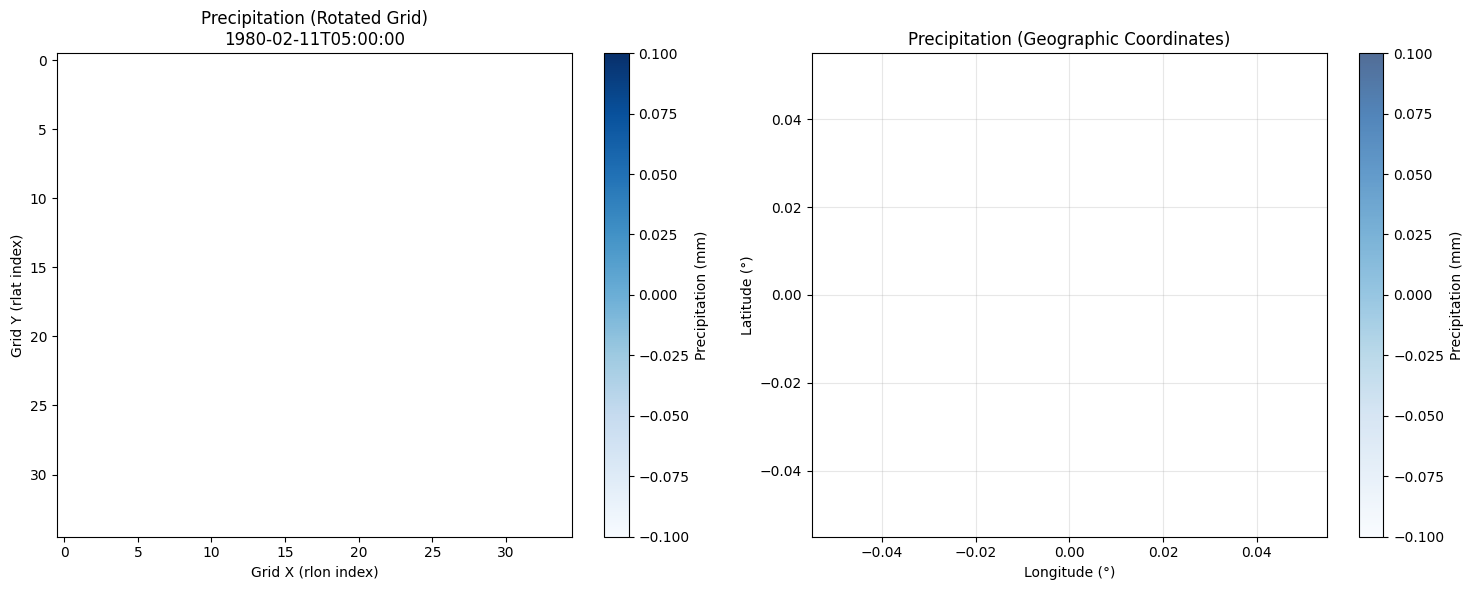

Precipitation statistics for this time slice:
  No valid precipitation data for this time slice


In [40]:
# Create a simple precipitation map for a specific time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Select a time slice with precipitation
time_slice = precip_data.isel(time=1000)  # Arbitrary time slice
precip_mm = time_slice * 1000  # Convert to mm

# Plot 1: Precipitation on rotated grid
im1 = ax1.imshow(precip_mm.values, cmap='Blues', aspect='auto')
ax1.set_title(f'Precipitation (Rotated Grid)\n{str(time_slice.time.values)[:19]}')
ax1.set_xlabel('Grid X (rlon index)')
ax1.set_ylabel('Grid Y (rlat index)')
plt.colorbar(im1, ax=ax1, label='Precipitation (mm)')

# Plot 2: Geographic coordinate scatter
lon = dataset.lon.values
lat = dataset.lat.values
scatter = ax2.scatter(lon.flatten(), lat.flatten(), 
                     c=precip_mm.values.flatten(), 
                     cmap='Blues', s=10, alpha=0.7)
ax2.set_xlabel('Longitude (°)')
ax2.set_ylabel('Latitude (°)')
ax2.set_title('Precipitation (Geographic Coordinates)')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax2, label='Precipitation (mm)')

plt.tight_layout()
plt.show()

print(f"Precipitation statistics for this time slice:")
valid_precip = precip_mm.values[~np.isnan(precip_mm.values)]
if len(valid_precip) > 0:
    print(f"  Valid points: {len(valid_precip)}")
    print(f"  Mean: {valid_precip.mean():.3f} mm")
    print(f"  Max: {valid_precip.max():.3f} mm")
else:
    print("  No valid precipitation data for this time slice")

## 10. Time Series Analysis

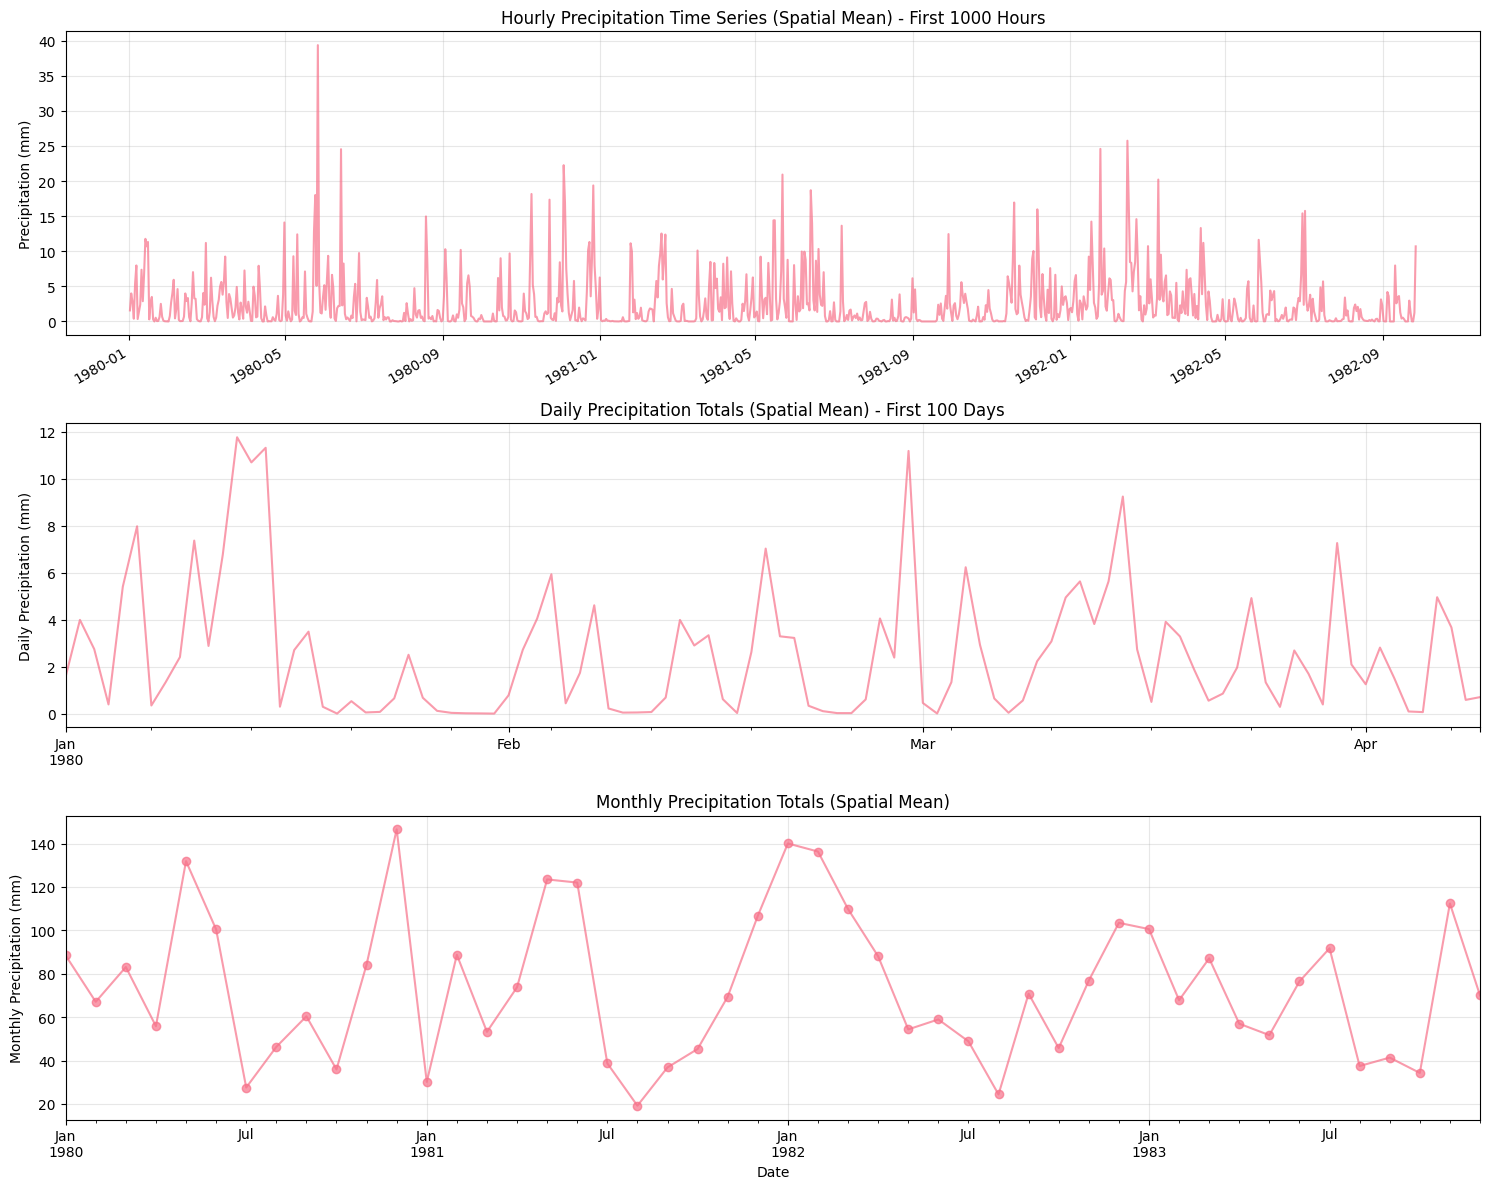

Time Series Statistics:
  Hourly mean: 2.410 mm
  Daily mean: 2.410 mm
  Monthly mean: 73.4 mm
  Max daily total: 39.349 mm
  Max monthly total: 146.5 mm


In [41]:
# Calculate spatial mean time series
spatial_mean = precip_data.mean(dim=['rlat', 'rlon'], skipna=True) * 1000  # Convert to mm

# Convert to pandas for easier handling
time_values = pd.to_datetime(precip_data.time.values)
precip_series = pd.Series(spatial_mean.values, index=time_values)

# Remove NaN values
precip_series = precip_series.dropna()

# Create time series plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

# Plot 1: Full time series (first 1000 points for clarity)
precip_series.iloc[:1000].plot(ax=ax1, alpha=0.7)
ax1.set_title('Hourly Precipitation Time Series (Spatial Mean) - First 1000 Hours')
ax1.set_ylabel('Precipitation (mm)')
ax1.grid(True, alpha=0.3)

# Plot 2: Daily aggregation
daily_precip = precip_series.resample('D').sum()
daily_precip.iloc[:100].plot(ax=ax2, alpha=0.7)  # First 100 days
ax2.set_title('Daily Precipitation Totals (Spatial Mean) - First 100 Days')
ax2.set_ylabel('Daily Precipitation (mm)')
ax2.grid(True, alpha=0.3)

# Plot 3: Monthly aggregation
monthly_precip = precip_series.resample('M').sum()
monthly_precip.plot(ax=ax3, marker='o', alpha=0.7)
ax3.set_title('Monthly Precipitation Totals (Spatial Mean)')
ax3.set_ylabel('Monthly Precipitation (mm)')
ax3.set_xlabel('Date')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print time series statistics
print(f"Time Series Statistics:")
print(f"  Hourly mean: {precip_series.mean():.3f} mm")
print(f"  Daily mean: {daily_precip.mean():.3f} mm")
print(f"  Monthly mean: {monthly_precip.mean():.1f} mm")
print(f"  Max daily total: {daily_precip.max():.3f} mm")
print(f"  Max monthly total: {monthly_precip.max():.1f} mm")

## 11. Coordinate System Visualization

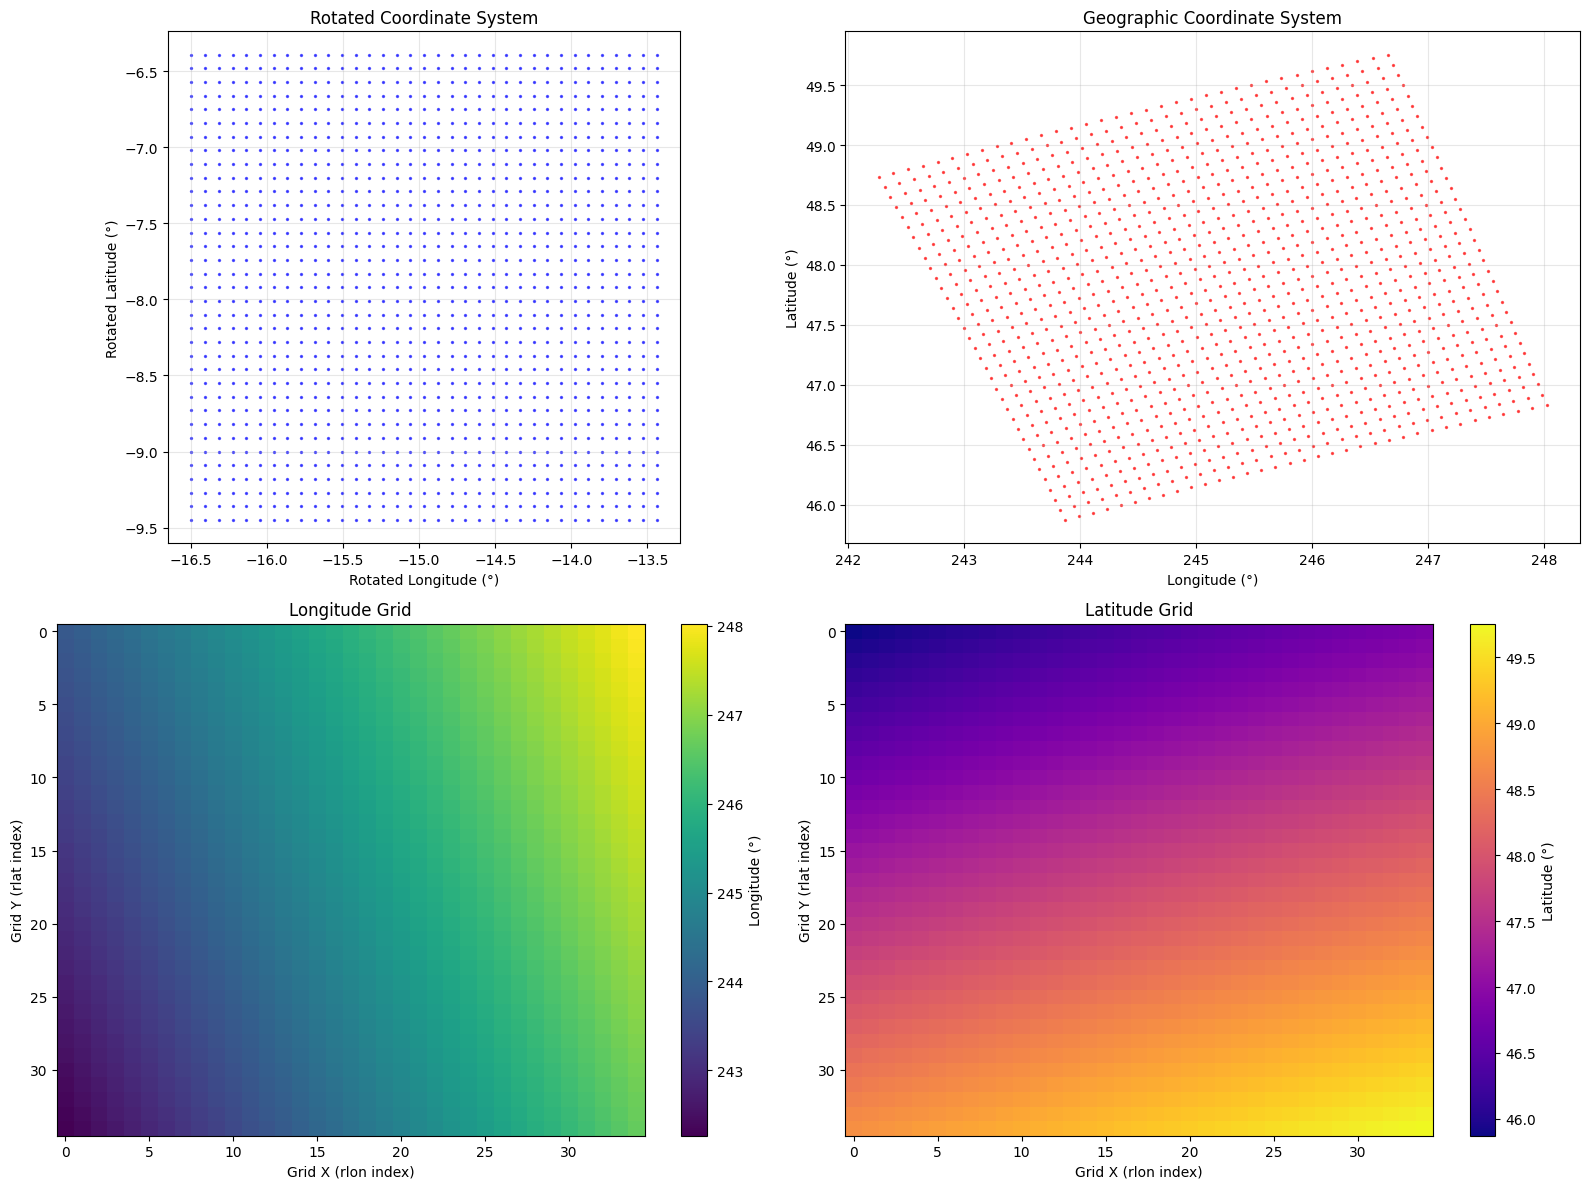

Coordinate Transformation Gradients:
  ∂lon/∂rlon: 0.125461 ± 0.002592
  ∂lat/∂rlat: 0.085034 ± 0.000572


In [42]:
# Visualize coordinate systems and transformations
rlon = dataset.rlon.values
rlat = dataset.rlat.values
lon = dataset.lon.values
lat = dataset.lat.values

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Rotated coordinate system
rlon_2d, rlat_2d = np.meshgrid(rlon, rlat)
ax1.scatter(rlon_2d.flatten(), rlat_2d.flatten(), c='blue', alpha=0.6, s=2)
ax1.set_xlabel('Rotated Longitude (°)')
ax1.set_ylabel('Rotated Latitude (°)')
ax1.set_title('Rotated Coordinate System')
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Plot 2: Geographic coordinate system
ax2.scatter(lon.flatten(), lat.flatten(), c='red', alpha=0.6, s=2)
ax2.set_xlabel('Longitude (°)')
ax2.set_ylabel('Latitude (°)')
ax2.set_title('Geographic Coordinate System')
ax2.grid(True, alpha=0.3)

# Plot 3: Longitude grid
im3 = ax3.imshow(lon, cmap='viridis', aspect='auto')
ax3.set_title('Longitude Grid')
ax3.set_xlabel('Grid X (rlon index)')
ax3.set_ylabel('Grid Y (rlat index)')
plt.colorbar(im3, ax=ax3, label='Longitude (°)')

# Plot 4: Latitude grid
im4 = ax4.imshow(lat, cmap='plasma', aspect='auto')
ax4.set_title('Latitude Grid')
ax4.set_xlabel('Grid X (rlon index)')
ax4.set_ylabel('Grid Y (rlat index)')
plt.colorbar(im4, ax=ax4, label='Latitude (°)')

plt.tight_layout()
plt.show()

# Calculate and display coordinate gradients
dlon_drlon = np.gradient(lon, axis=1)
dlat_drlat = np.gradient(lat, axis=0)

print(f"Coordinate Transformation Gradients:")
print(f"  ∂lon/∂rlon: {dlon_drlon.mean():.6f} ± {dlon_drlon.std():.6f}")
print(f"  ∂lat/∂rlat: {dlat_drlat.mean():.6f} ± {dlat_drlat.std():.6f}")

## 12. Generate Complete Analysis Report

# Generate all visualizations using the analyzer
print("Generating comprehensive visualizations...")
analyzer.create_enhanced_visualizations(output_dir="notebook_output_plots")

# Export comprehensive report
print("\nExporting comprehensive report...")
analyzer.export_comprehensive_report(output_file="notebook_analysis_report.txt")

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)
print("Generated outputs:")
print("- Visualizations: notebook_output_plots/ directory")
print("- Report: notebook_analysis_report.txt")

# Display summary of all analysis results
print(f"\nAnalysis Results Summary:")
print(f"Available analysis sections: {list(analyzer.analysis_results.keys())}")

for section, data in analyzer.analysis_results.items():
    if isinstance(data, dict):
        print(f"\n{section.upper()} ({len(data)} metrics):")
        for key, value in list(data.items())[:5]:  # Show first 5 items
            print(f"  {key}: {value}")
        if len(data) > 5:
            print(f"  ... and {len(data)-5} more metrics")

## 13. Cleanup

In [43]:
# Close the dataset
analyzer.close()
print("✓ Dataset closed and analysis complete")

# Display final summary
print("\n" + "="*60)
print("NOTEBOOK ANALYSIS SUMMARY")
print("="*60)
print("This notebook demonstrated:")
print("✓ Loading and examining CaSR NetCDF data")
print("✓ Temporal analysis of 4-year hourly precipitation data")
print("✓ Comprehensive coordinate system analysis")
print("✓ Precipitation statistics and categorization")
print("✓ Interactive data exploration and visualization")
print("✓ Time series analysis (hourly, daily, monthly)")
print("✓ Coordinate transformation visualization")
print("✓ Complete analysis report generation")
print("\nThe enhanced CaSR analyzer provides a comprehensive")
print("framework for analyzing precipitation and coordinate data.")

Dataset closed.
✓ Dataset closed and analysis complete

NOTEBOOK ANALYSIS SUMMARY
This notebook demonstrated:
✓ Loading and examining CaSR NetCDF data
✓ Temporal analysis of 4-year hourly precipitation data
✓ Comprehensive coordinate system analysis
✓ Precipitation statistics and categorization
✓ Interactive data exploration and visualization
✓ Time series analysis (hourly, daily, monthly)
✓ Coordinate transformation visualization
✓ Complete analysis report generation

The enhanced CaSR analyzer provides a comprehensive
framework for analyzing precipitation and coordinate data.
